In [13]:
import pandas as pd

# Stupid Baseline

This modeless prediction has the score 0.395, which is surprisingly high on the leaderboard. The outcome of this baseline is based on the mode of the score when we group by title on the train_labels set.

In [12]:
%%time

#Local
train= pd.read_csv("train.csv")
test= pd.read_csv("test.csv")
train_labels = pd.read_csv('train_labels.csv')

# #Kaggle
# train = pd.read_csv('../input/data-science-bowl-2019/train.csv')
# test = pd.read_csv('../input/data-science-bowl-2019/test.csv')
# train_labels = pd.read_csv('../input/data-science-bowl-2019/train_labels.csv')
# specs = pd.read_csv('../input/data-science-bowl-2019/specs.csv', converters={'args': json.loads})

CPU times: user 54.8 s, sys: 34.9 s, total: 1min 29s
Wall time: 2min 2s


In [7]:
#Get the mode
labels_map = dict(train_labels.groupby('title')['accuracy_group'].agg(lambda x:x.value_counts().index[0])) 

### Submission

In [14]:
submission=pd.read_csv('sample_submission.csv')

In [15]:
submission['accuracy_group'] = test.groupby('installation_id').last()['title'].map(labels_map).reset_index(drop=True)
submission.head()

,installation_id,accuracy_group
0,00abaee7,3
1,01242218,3
2,017c5718,3
3,01a44906,3
4,01bc6cb6,3


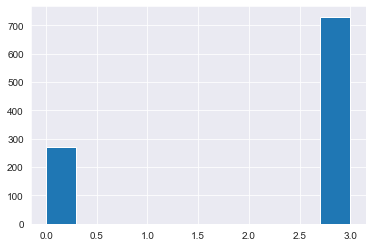

In [19]:
submission.accuracy_group.hist()

Observe that because the score was not bad, we would expect a similar shape of the prediction histogram we go back and wprk on it seriously